**Conditionial Sampling of $\bar x_{j+1}$ knowing $x_{j+1}$ with $2^{J-j} =$ #section. 
Sampling is achieved with MALA. Step size should be adjusted in order to have an acceptance rate $\simeq 0.57$.**

# Import Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
import pickle
#Importing the package
path = '/content/drive/MyDrive/Colab Notebooks/'
sys.path.append(os.path.abspath(path+'WCRG'))
sys.path.append(os.path.abspath(path+'WCRG/WCRG'))
sys.path.append(os.path.abspath(path+'WCRG/Wavelet_Packets'))
sys.path.append(os.path.abspath(path+'WCRG/WCRG/Models'))
#Wavelets
from Wavelet_Packets import *
#Ansatz
from WCRG import *


# Import Data

In [3]:
#directories for models and synthesis
dir_synth = 'content/drive/MyDrive/Colab Notebooks/WCRG/Notebooks Examples/Synths/'
dir_mod = '/content/drive/MyDrive/Colab Notebooks/WCRG/Notebooks Examples/Models/'
#This key will be add to file name for synthesis and loading
KEY = '128_phi4_0.68'
#Import data
device='cuda' #could be 'cpu' as well
Data = torch.tensor(np.load('/content/drive/MyDrive/Colab Notebooks/Phi4/phi4_L128_Beta0.68.npy')).to(device).to(torch.float32)
print(Data.mean(),Data.std())
#Normalising Data
Data= (Data - Data.mean())/Data.std()
print(Data.shape)
#Computing the number of scales
J=int(np.log2(Data.shape[-1])) #Images of size 2**J
print('J = '+str(J))

tensor(0.0266, device='cuda:0') tensor(0.9076, device='cuda:0')
torch.Size([10000, 128, 128])
J = 7


You must define the same wavelet used for energy learning, in order to compare the generated $x_j$ and the real $x_j$. If it's not the same wavelet, when you try to compare, the statistics won't match. However, if you want to generate without comparing, you do not need to define this wavelet. 

In [4]:
#Wavelet
m=4
W=Db_wavelets(m,device='cuda',mode='Periodic') #Debauchies 4

#1

We sample $x_J$ using a learned energy $E(x_J)$.

In [ ]:
#Define Scale, maps of size 1*1 = L*L
L=1
depth = J-int(np.log2(L))
#print(depth)
#Load Real data x_J, for comparison only
phi_s = load_data(W,Data,depth,J,show_hist=False)

In [ ]:
#Load The model we will sample from
ansatz = load_ansatz(L,KEY,dir_mod)

In [ ]:
#Sampling
window_min,window_max = ansatz.ansatze[0].centers[0],ansatz.ansatze[0].centers[-1]
n_repeat = 1
n_batch = 10000
n_steps = 500 
step_size = 3e2
n_repeat = 1
x_reco = LANGEVINMALA(ansatz,
             torch.zeros_like(phi_s),
             window_min,
             window_max,
             n_steps,
             step_size,
             n_batch,
             n_repeat)

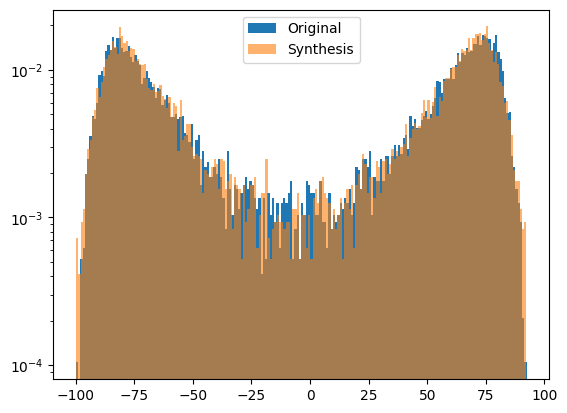

In [19]:
compare_hist(x_reco,phi_s)

In [20]:
#save the generated x_J
save(x_reco,L,KEY,dir_synth)

# 2

We sample $x_{j+1} $ using a learned energy $\bar E(\bar x_{j+1}\vert x_{j+1})$ for $j = 6$ 

In [ ]:
#Define Scale, maps of size 2^{J-j}*2^{J-j} = L*L
L=2
depth = J-int(np.log2(L))
print('depth = '+str(depth))
#Load Real data x_j, for comparison only
phi_s = load_data(W,Data,depth,J)

In [24]:
#Load The model we will sample from
ansatz = load_ansatz(L,KEY,dir_mod)

In [26]:
#We generate \bar x_{j+1} conditionaly to previously sampled x_{j+1}
x_reco = load(L//2,KEY,W,dir_synth)

window_min,window_max = ansatz.ansatze[0].centers[0],ansatz.ansatze[0].centers[-1]
n_repeat = 1
n_batch = len(x_reco)
n_steps = 100 
step_size = 25
n_repeat = 1
x_reco = LANGEVINMALA(ansatz,
             x_reco,
             window_min,
             window_max,
             n_steps,
             step_size,
             n_batch,
             n_repeat)

torch.Size([10000, 1, 1])
torch.Size([10000, 2, 2])
Acceptance_rate =0.7822
Acceptance_rate =0.721
Acceptance_rate =0.725
Acceptance_rate =0.7147
Acceptance_rate =0.712
Acceptance_rate =0.7243999999999999
Acceptance_rate =0.7188
Acceptance_rate =0.7159
Acceptance_rate =0.7195
Acceptance_rate =0.7137


Compare histograms of the field $x_{j}$

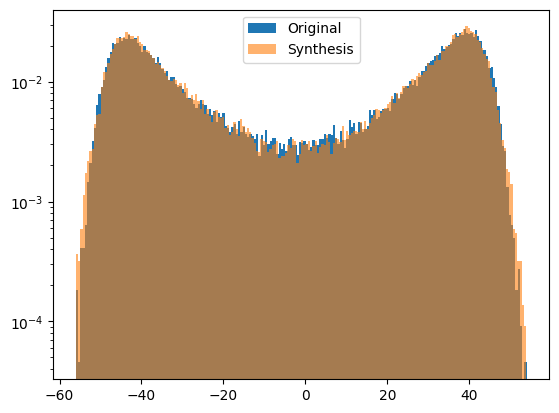

In [27]:
compare_hist(x_reco,phi_s)

Compare histograms of the $\bar x_{j+1}$ fields.

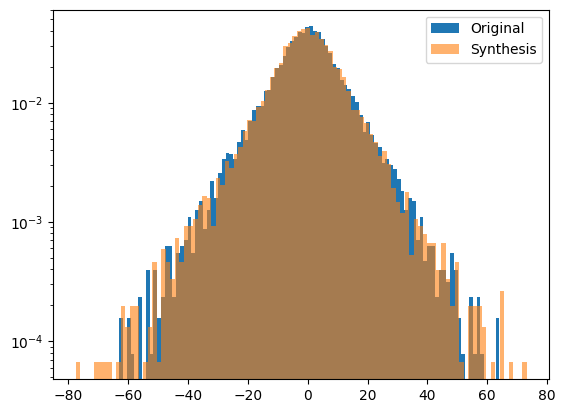

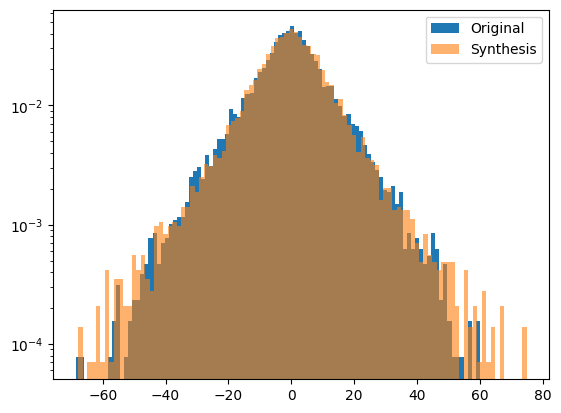

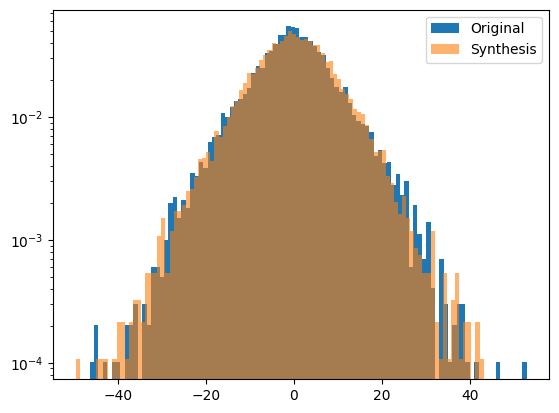

In [28]:
x_high_reco = ansatz.decompose(x_reco.cuda())[1]
x_high = ansatz.decompose(phi_s)[1]
compare_hist(x_high_reco[:,0],x_high[:,0],bins=100)
compare_hist(x_high_reco[:,1],x_high[:,1],bins=100)
compare_hist(x_high_reco[:,2],x_high[:,2],bins=100)

In [29]:
save(x_reco,L,KEY,dir_synth)

# 4

We sample $x_{j+1} $ using a learned energy $\bar E(\bar x_{j+1}\vert x_{j+1})$ for $j = 5$ 

In [ ]:
#Define Scale, maps of size 2^{J-j}*2^{J-j} = L*L
L=4
depth = J-int(np.log2(L))
print('depth = '+str(depth))
#Load Real data x_j, for comparison only
phi_s = load_data(W,Data,depth,J)

In [32]:
#Load The model we will sample from
ansatz = load_ansatz(L,KEY,dir_mod)

In [42]:
x_reco = load(L//2,KEY,W,dir_synth)

window_min,window_max = ansatz.ansatze[0].centers[0],ansatz.ansatze[0].centers[-1]
n_repeat = 1
n_batch = len(x_reco)
n_steps = 40
step_size = 10
n_repeat = 1
x_reco = LANGEVINMALA(ansatz,
             x_reco,
             window_min,
             window_max,
             n_steps,
             step_size,
             n_batch,
             n_repeat)

torch.Size([10000, 2, 2])
torch.Size([10000, 4, 4])
Acceptance_rate =0.5699000000000001
Acceptance_rate =0.7128
Acceptance_rate =0.7054
Acceptance_rate =0.7054


Compare histograms of the field $x_{j}$

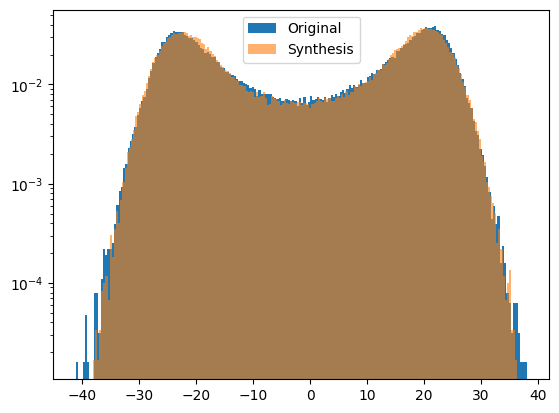

In [43]:
compare_hist(x_reco,phi_s,)

Compare histograms of the $\bar x_{j+1}$ fields.

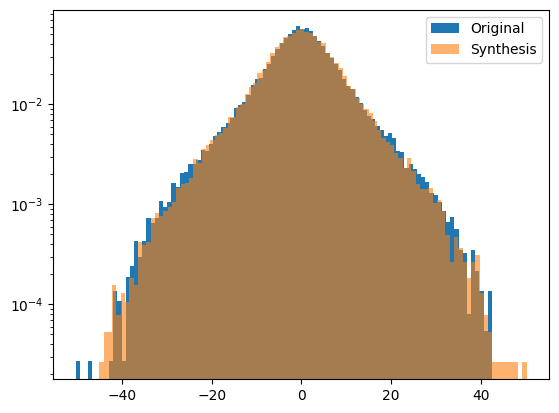

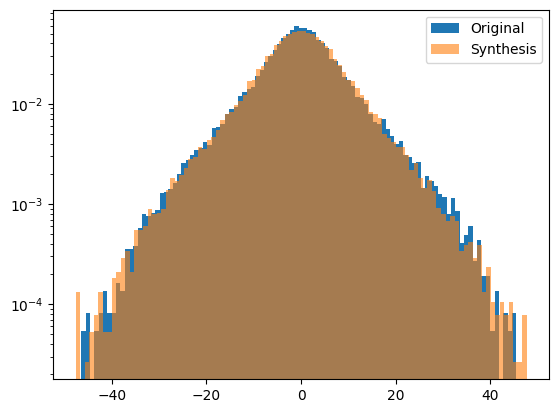

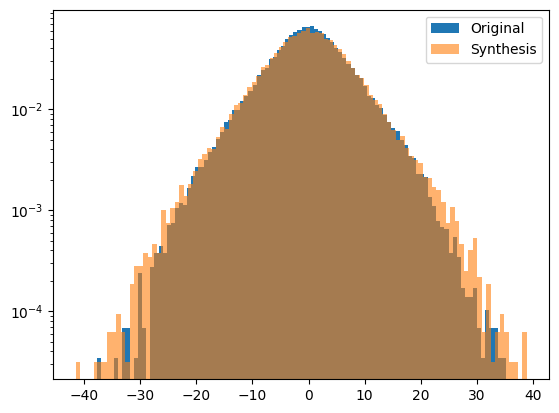

In [44]:
x_high_reco = ansatz.decompose(x_reco.cuda())[1]
x_high = ansatz.decompose(phi_s)[1]
compare_hist(x_high_reco[:,0],x_high[:,0],bins=100)
compare_hist(x_high_reco[:,1],x_high[:,1],bins=100)
compare_hist(x_high_reco[:,2],x_high[:,2],bins=100)

In [45]:
save(x_reco,L,KEY,dir_synth)

# 8 

We sample $x_{j+1} $ using a learned energy $\bar E(\bar x_{j+1}\vert x_{j+1})$ for $j = 4$ 

In [ ]:
#Define Scale, maps of size 2^{J-j}*2^{J-j} = L*L
L=8
depth = J-int(np.log2(L))
print('depth = '+str(depth))
#Load Real data x_j, for comparison only
phi_s = load_data(W,Data,depth,J,show_hist=False)

In [47]:
#Load The model we will sample from
ansatz = load_ansatz(L,KEY,dir_mod)

In [61]:
#We generate \bar x_{j+1} conditionaly to previously sampled x_{j+1}
x_reco = load(L//2,KEY,W,dir_synth)

window_min,window_max = ansatz.ansatze[0].centers[0],ansatz.ansatze[0].centers[-1]
n_repeat = 1
n_batch = len(x_reco)
n_steps = 100 
step_size = 2
n_repeat = 1
x_reco = LANGEVINMALA(ansatz,
             x_reco,
             window_min,
             window_max,
             n_steps,
             step_size,
             n_batch,
             n_repeat)

torch.Size([10000, 4, 4])
torch.Size([10000, 8, 8])
Acceptance_rate =0.487
Acceptance_rate =0.6542
Acceptance_rate =0.6668000000000001
Acceptance_rate =0.665
Acceptance_rate =0.6585
Acceptance_rate =0.6646000000000001
Acceptance_rate =0.6517
Acceptance_rate =0.6541
Acceptance_rate =0.6528
Acceptance_rate =0.659


Compare histogram and power spectrum of the field $x_{j}$

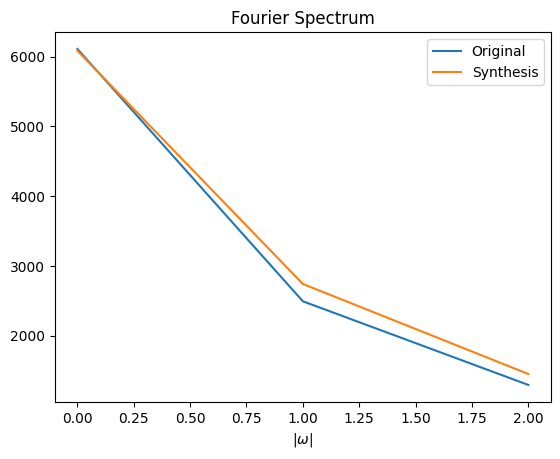

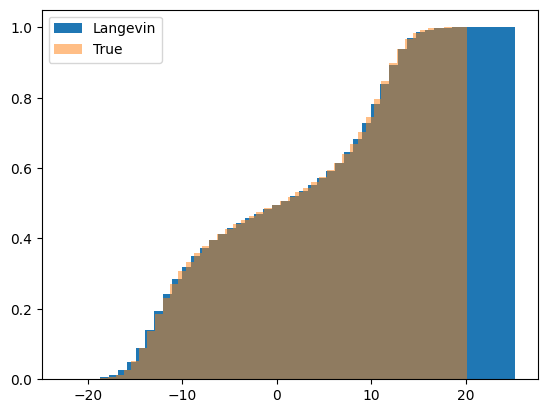

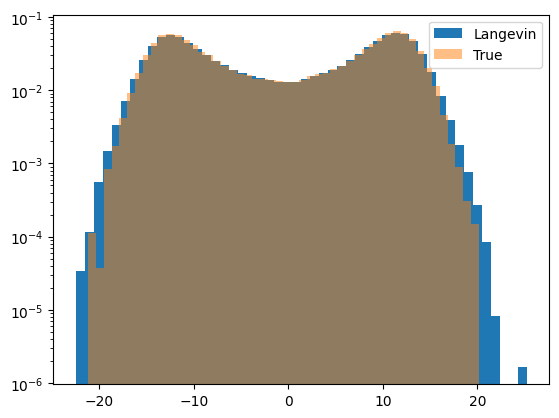

mean_true = tensor(-0.1572)
std_true = tensor(10.5504)
mean_langevin = tensor(-0.0883)
std_langevin = tensor(10.6637)


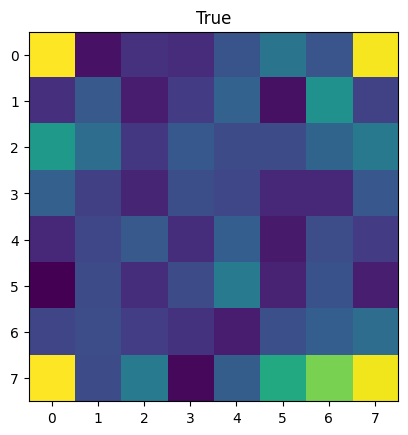

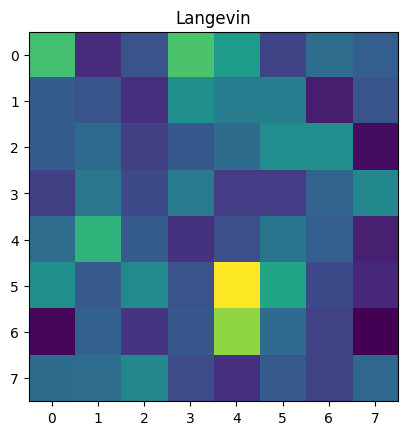

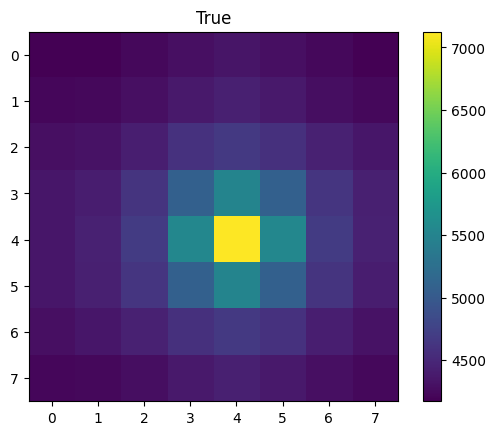

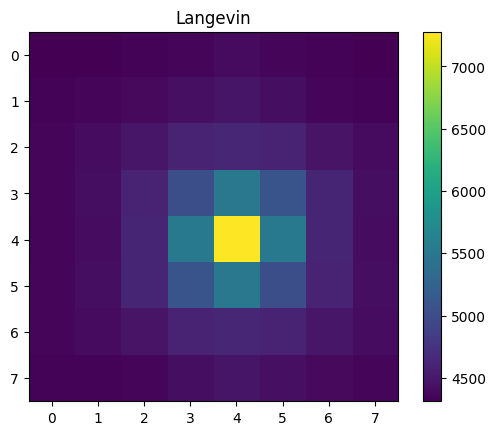

In [62]:
#Compare Synthesis and originals
Show_langevin(phi_s,x_reco,log=True)

Compare histograms of the $\bar x_{j+1}$ fields.

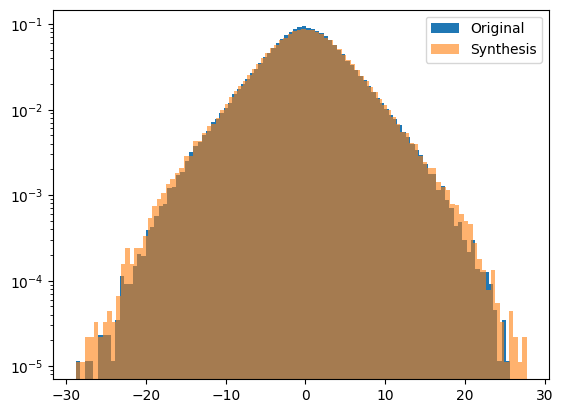

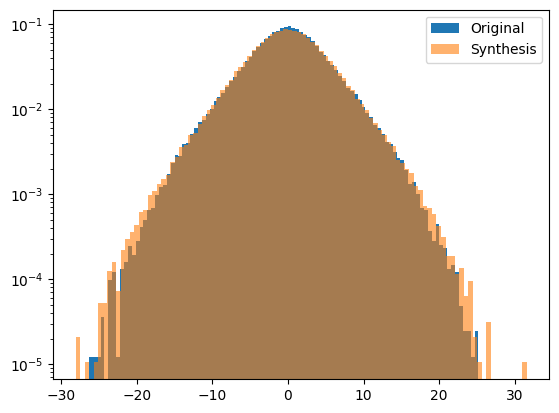

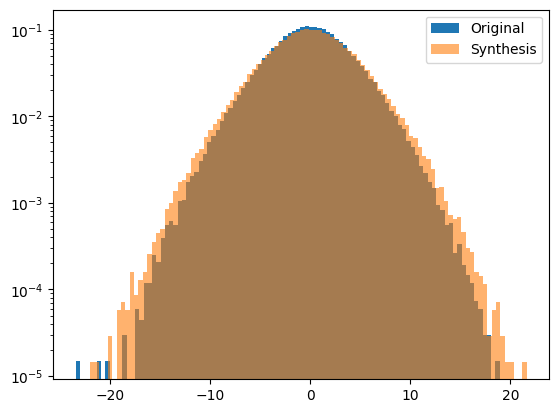

In [63]:
x_high_reco = ansatz.decompose(x_reco.cuda())[1]
x_high = ansatz.decompose(phi_s)[1][:len(x_reco)]
compare_hist(x_high_reco[:,0],x_high[:,0],bins=100)
compare_hist(x_high_reco[:,1],x_high[:,1],bins=100)
compare_hist(x_high_reco[:,2],x_high[:,2],bins=100)

In [64]:
save(x_reco,L,KEY,dir_synth)

# 16

We sample $x_{j+1} $ using a learned energy $\bar E(\bar x_{j+1}\vert x_{j+1})$ for $j = 3$ 

In [65]:
#Define Scale, maps of size 2^{J-j}*2^{J-j} = L*L
L=16
depth = J-int(np.log2(L))
print('depth = '+str(depth))
#Load Real data x_j, for comparison only
phi_s = load_data(W,Data,depth,J,show_hist=False)

depth = 3


In [66]:
#Load The model we will sample from
ansatz = load_ansatz(L,KEY,dir_mod)

In [70]:
#We generate \bar x_{j+1} conditionaly to previously sampled x_{j+1}
x_reco = load(L//2,KEY,W,dir_synth)

window_min,window_max = ansatz.ansatze[0].centers[0],ansatz.ansatze[0].centers[-1]
n_repeat = 1
n_batch = len(phi_s)//5
n_steps = 200 
step_size = 5e-1
n_repeat = 1
x_reco = LANGEVINMALA(ansatz,
             x_reco,
             window_min,
             window_max,
             n_steps,
             step_size,
             n_batch,
             n_repeat)

torch.Size([10000, 8, 8])
torch.Size([10000, 16, 16])
Acceptance_rate =0.21850000000000003
Acceptance_rate =0.41700000000000004
Acceptance_rate =0.5315
Acceptance_rate =0.5395
Acceptance_rate =0.5595
Acceptance_rate =0.5815
Acceptance_rate =0.5775
Acceptance_rate =0.606
Acceptance_rate =0.56
Acceptance_rate =0.5735
Acceptance_rate =0.5895
Acceptance_rate =0.5675
Acceptance_rate =0.5705
Acceptance_rate =0.5635
Acceptance_rate =0.562
Acceptance_rate =0.5705
Acceptance_rate =0.5665
Acceptance_rate =0.579
Acceptance_rate =0.5605
Acceptance_rate =0.5740000000000001


Compare histogram and power spectrum of the field $x_{j}$

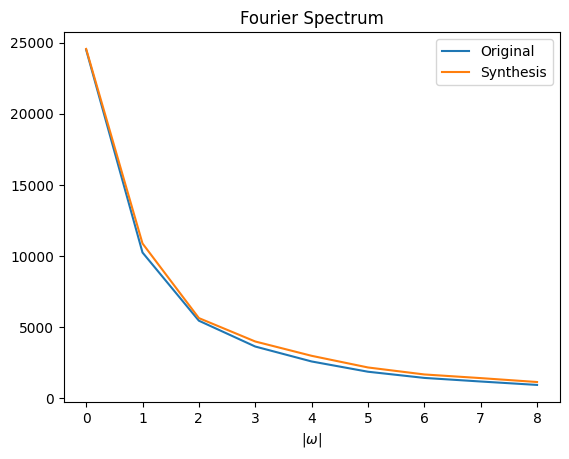

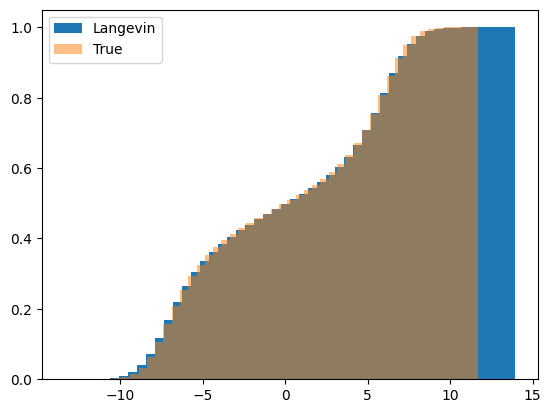

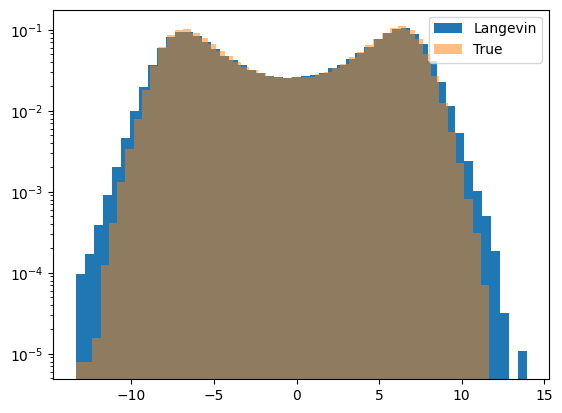

mean_true = tensor(-0.0786)
std_true = tensor(5.7718)
mean_langevin = tensor(-0.0228)
std_langevin = tensor(5.8743)


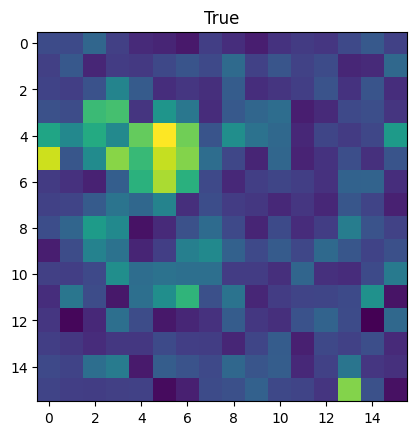

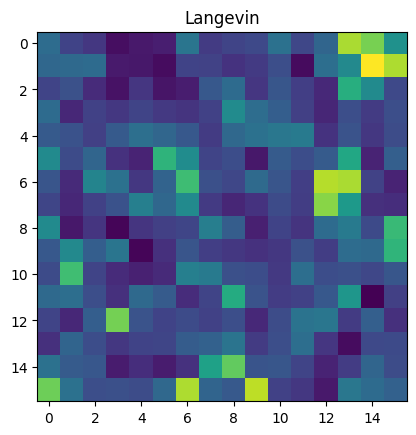

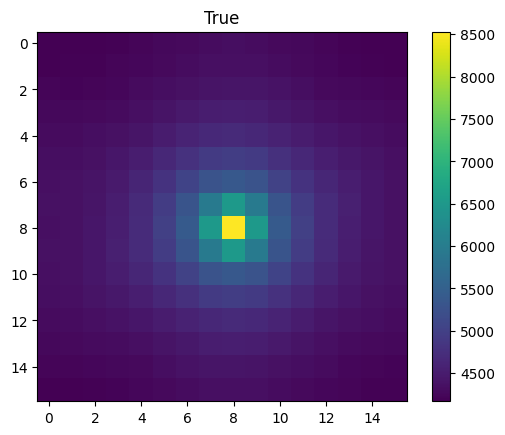

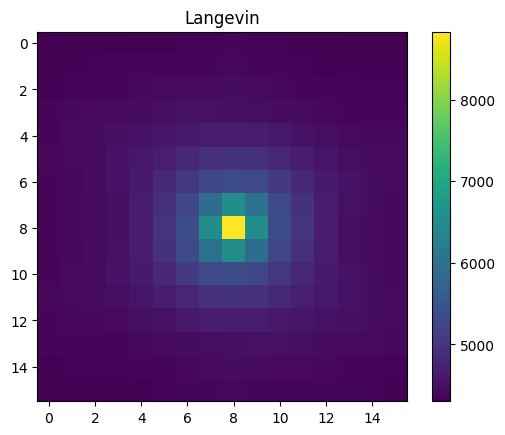

In [71]:
#Compare Synthesis and originals
Show_langevin(phi_s[::10],x_reco,log=True)

Compare histograms of the $\bar x_{j+1}$ fields.

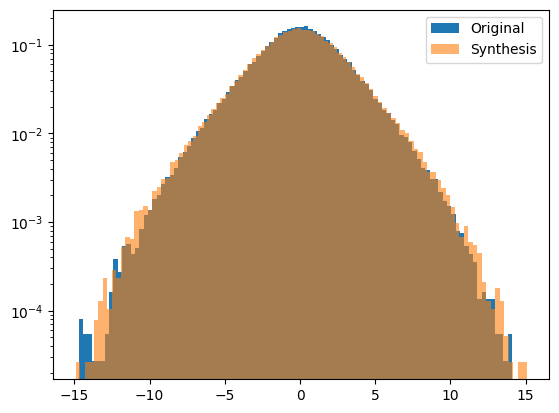

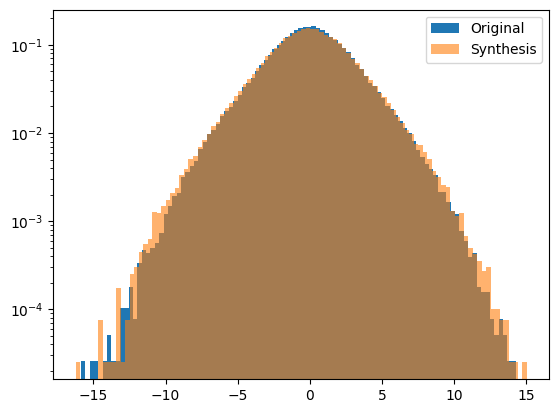

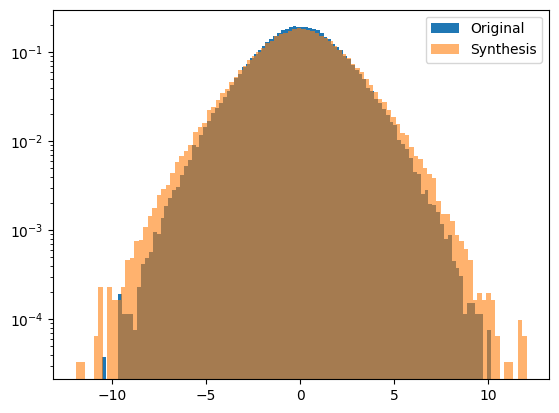

In [73]:
x_high_reco = ansatz.decompose(x_reco.cuda())[1]
x_high = ansatz.decompose(phi_s)[1][:len(x_reco)]
compare_hist(x_high_reco[:,0],x_high[:,0],bins=100)
compare_hist(x_high_reco[:,1],x_high[:,1],bins=100)
compare_hist(x_high_reco[:,2],x_high[:,2],bins=100)

In [74]:
save(x_reco,L,KEY,dir_synth)

# 32 

We sample $x_{j+1} $ using a learned energy $\bar E(\bar x_{j+1}\vert x_{j+1})$ for $j = 2$

In [6]:
#Define Scale, maps of size 2^{J-j}*2^{J-j} = L*L
L=32
depth = J-int(np.log2(L))
print('depth = '+str(depth))
#Load Real data x_j, for comparison only
phi_s = load_data(W,Data,depth,J,show_hist=False)

depth = 2


In [7]:
#Load The model we will sample from
ansatz = load_ansatz(L,KEY,dir_mod)

In [8]:
#We generate \bar x_{j+1} conditionaly to previously sampled x_{j+1}
x_reco = load(L//2,KEY,W,dir_synth)

window_min,window_max = ansatz.ansatze[0].centers[0],ansatz.ansatze[0].centers[-1]
n_repeat = 1
n_batch = 500
n_steps = 500 
step_size = 1e-1
n_repeat = 1
x_reco = LANGEVINMALA(ansatz,
             x_reco,
             window_min,
             window_max,
             n_steps,
             step_size,
             n_batch,
             n_repeat)

torch.Size([2000, 16, 16])
torch.Size([2000, 32, 32])


/usr/local/lib/python3.10/dist-packages/torch/_functorch/deprecated.py:80: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.jacrev is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.jacrev instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('jacrev')
/usr/local/lib/python3.10/dist-packages/torch/_functorch/deprecated.py:58: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('vmap', 'torch.vmap')


Acceptance_rate =0.17200000000000004
Acceptance_rate =0.35
Acceptance_rate =0.546
Acceptance_rate =0.5820000000000001
Acceptance_rate =0.62
Acceptance_rate =0.6779999999999999
Acceptance_rate =0.638
Acceptance_rate =0.628
Acceptance_rate =0.652
Acceptance_rate =0.65
Acceptance_rate =0.654
Acceptance_rate =0.634
Acceptance_rate =0.63
Acceptance_rate =0.6579999999999999
Acceptance_rate =0.624
Acceptance_rate =0.652
Acceptance_rate =0.652
Acceptance_rate =0.6759999999999999
Acceptance_rate =0.654
Acceptance_rate =0.634
Acceptance_rate =0.638
Acceptance_rate =0.692
Acceptance_rate =0.64
Acceptance_rate =0.648
Acceptance_rate =0.64
Acceptance_rate =0.6719999999999999
Acceptance_rate =0.6599999999999999
Acceptance_rate =0.614
Acceptance_rate =0.652
Acceptance_rate =0.6859999999999999
Acceptance_rate =0.646
Acceptance_rate =0.628
Acceptance_rate =0.642
Acceptance_rate =0.6579999999999999
Acceptance_rate =0.622
Acceptance_rate =0.656
Acceptance_rate =0.648
Acceptance_rate =0.642
Acceptance_rat

Compare histogram and power spectrum of the field $x_{j}$

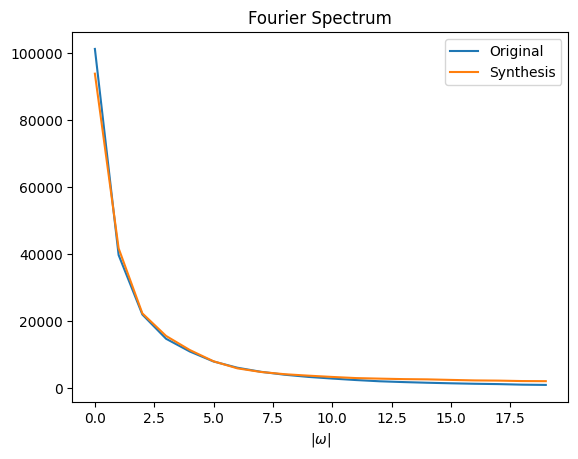

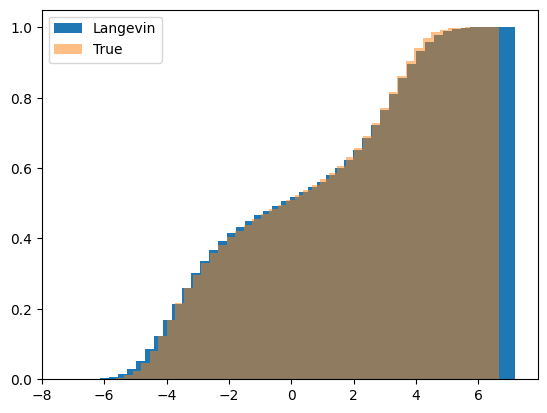

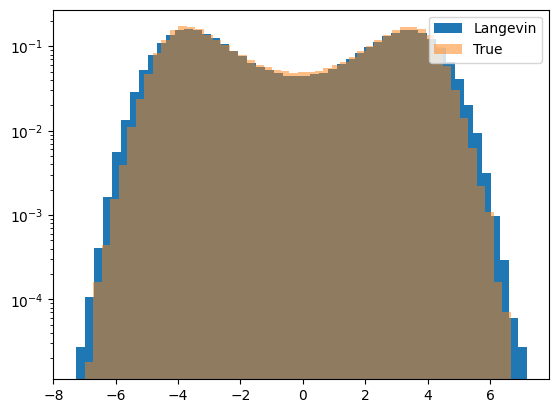

mean_true = tensor(-0.1044)
std_true = tensor(3.1701)
mean_langevin = tensor(-0.1375)
std_langevin = tensor(3.2748)


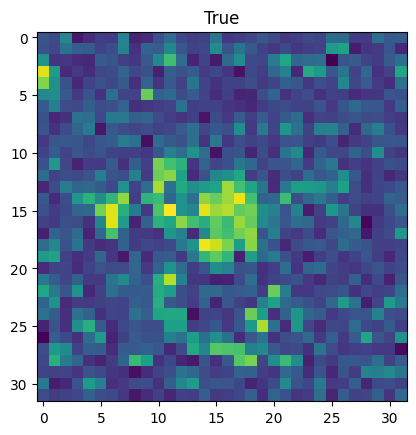

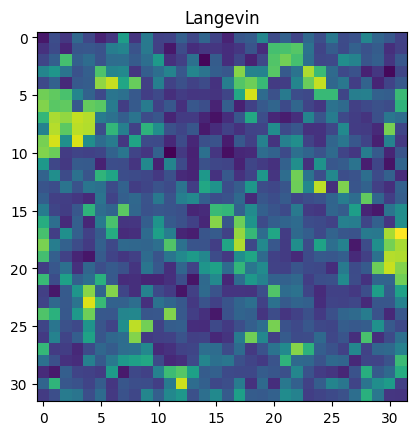

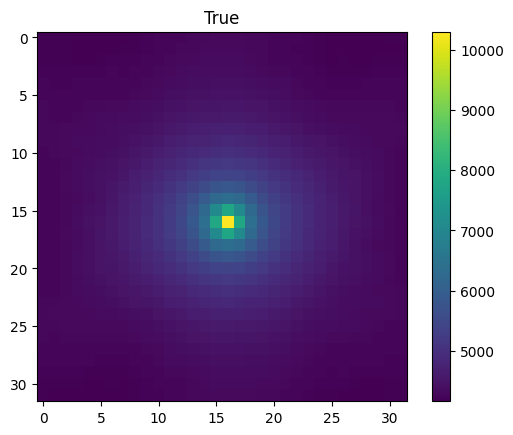

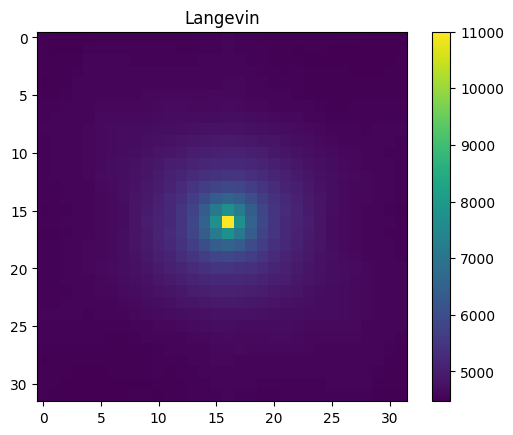

In [9]:
#Compare Synthesis and originals
Show_langevin(phi_s[::50],x_reco,log=True)

Compare histograms of the $\bar x_{j+1}$ fields.

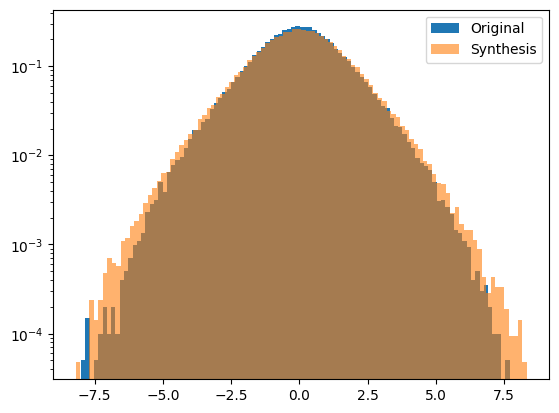

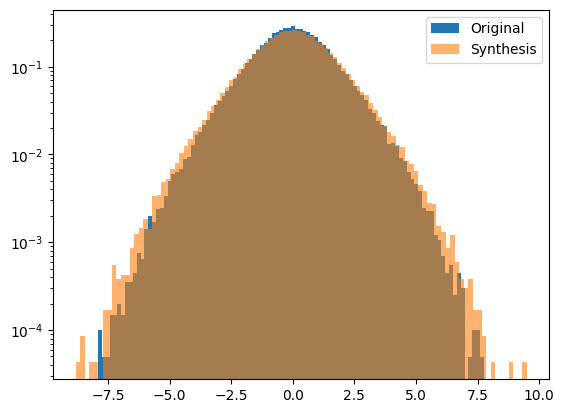

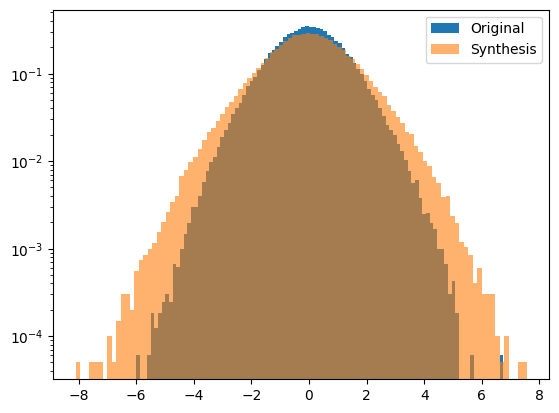

In [10]:
x_high_reco = ansatz.decompose(x_reco.cuda())[1]
x_high = ansatz.decompose(phi_s)[1][:len(x_reco)]
compare_hist(x_high_reco[:,0],x_high[:,0],bins=100)
compare_hist(x_high_reco[:,1],x_high[:,1],bins=100)
compare_hist(x_high_reco[:,2],x_high[:,2],bins=100)

In [11]:
save(x_reco,L,KEY,dir_synth)

# 64 

We sample $x_{j+1} $ using a learned energy $\bar E(\bar x_{j+1}\vert x_{j+1})$ for $j = 1$

In [12]:
#Define Scale, maps of size 2^{J-j}*2^{J-j} = L*L
L=64
depth = J-int(np.log2(L))
print('depth = '+str(depth))
#Load Real data x_j, for comparison only
phi_s = load_data(W,Data,depth,J,show_hist=False)

depth = 1


In [13]:
#Load The model we will sample from
ansatz = load_ansatz(L,KEY,dir_mod)

In [14]:
#We generate \bar x_{j+1} conditionaly to previously sampled x_{j+1}
x_reco = load(L//2,KEY,W,dir_synth)[::5]

window_min,window_max = ansatz.ansatze[0].centers[0],ansatz.ansatze[0].centers[-1]
n_repeat = 1
n_batch = 200
n_steps = 250 
step_size = 1.5e-2
n_repeat = 1
x_reco = LANGEVINMALA(ansatz,
             x_reco,
             window_min,
             window_max,
             n_steps,
             step_size,
             n_batch,
             n_repeat)

torch.Size([500, 32, 32])
torch.Size([500, 64, 64])
Acceptance_rate =0.33999999999999997
Acceptance_rate =0.47
Acceptance_rate =0.47
Acceptance_rate =0.71
Acceptance_rate =0.73
Acceptance_rate =0.79
Acceptance_rate =0.73
Acceptance_rate =0.74
Acceptance_rate =0.78
Acceptance_rate =0.73
Acceptance_rate =0.85
Acceptance_rate =0.85
Acceptance_rate =0.76
Acceptance_rate =0.87
Acceptance_rate =0.77
Acceptance_rate =0.76
Acceptance_rate =0.79
Acceptance_rate =0.71
Acceptance_rate =0.79
Acceptance_rate =0.76
Acceptance_rate =0.75
Acceptance_rate =0.8200000000000001
Acceptance_rate =0.8200000000000001
Acceptance_rate =0.87
Acceptance_rate =0.78


Compare histogram and power spectrum of the field $x_{j}$

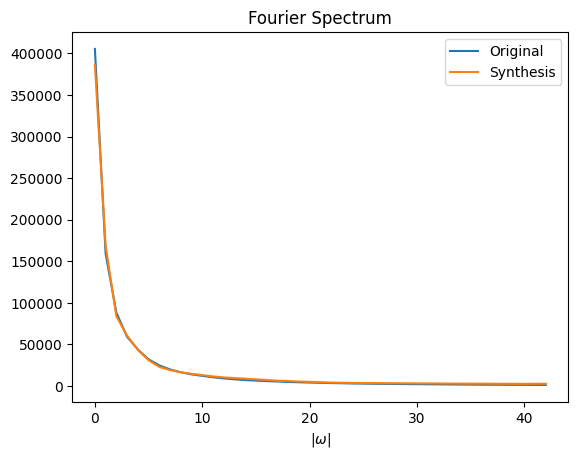

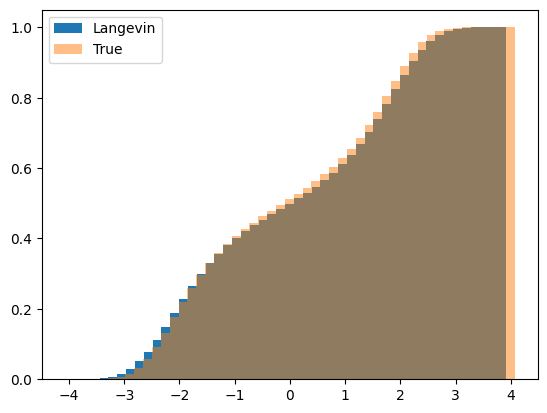

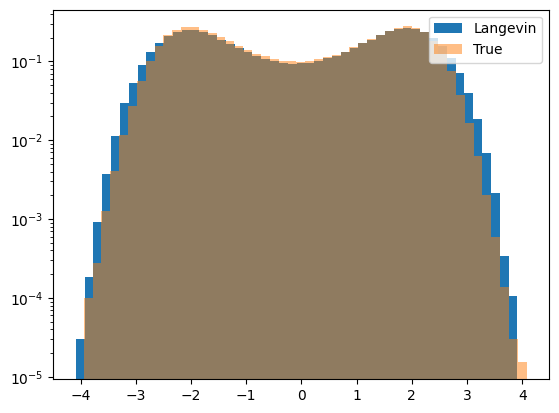

mean_true = tensor(-0.0522)
std_true = tensor(1.7525)
mean_langevin = tensor(-0.0057)
std_langevin = tensor(1.8226)


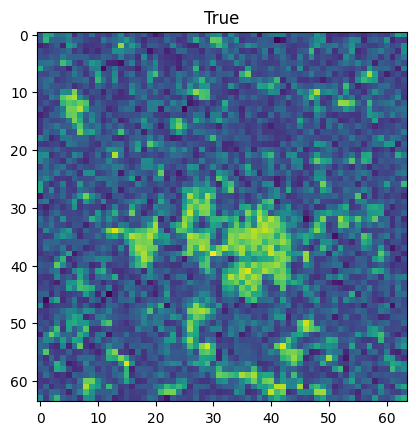

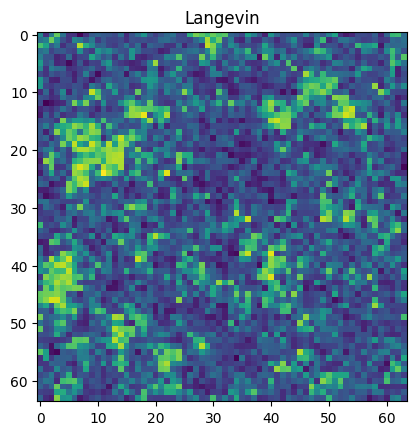

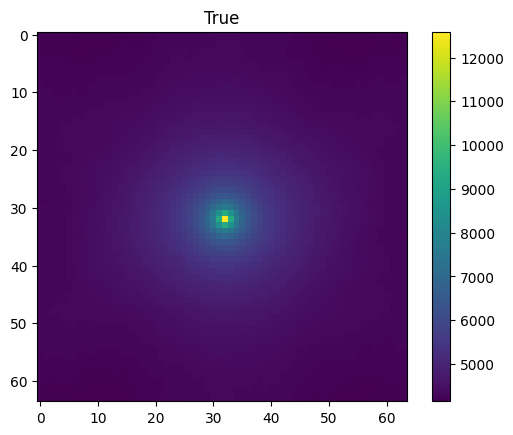

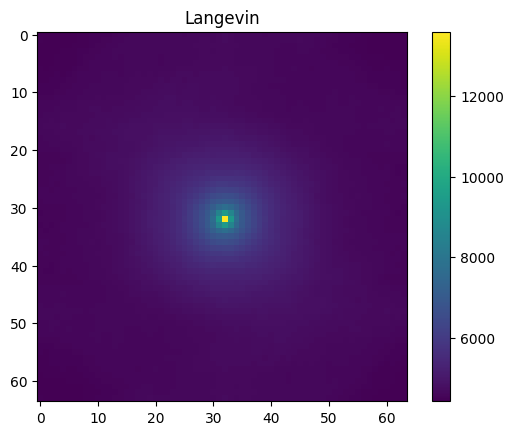

In [15]:
#Compare Synthesis and originals
Show_langevin(phi_s[::50],x_reco,log=True)

Compare histograms of the $\bar x_{j+1}$ fields.

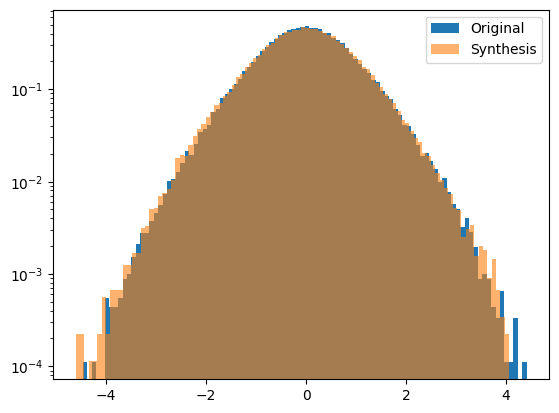

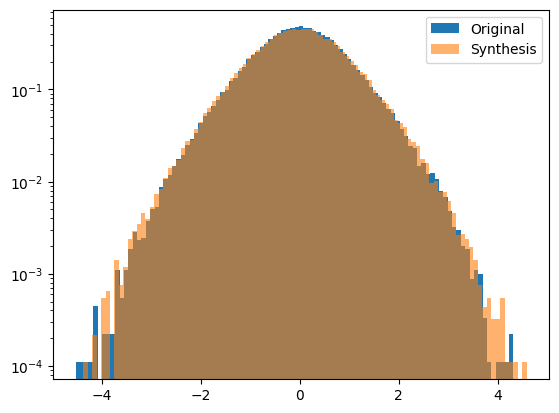

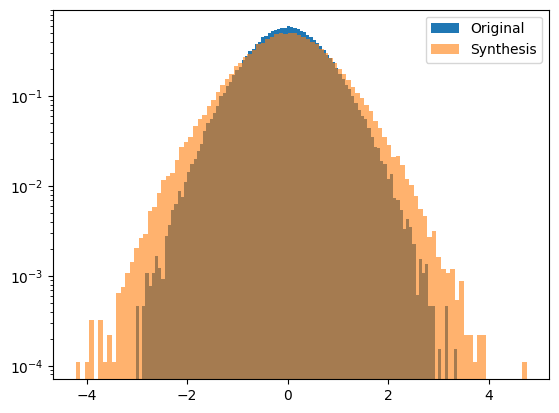

In [17]:
x_high_reco = ansatz.decompose(x_reco.cuda())[1]
x_high = ansatz.decompose(phi_s)[1][:len(x_reco)]
compare_hist(x_high_reco[:,0],x_high[:,0],bins=100)
compare_hist(x_high_reco[:,1],x_high[:,1],bins=100)
compare_hist(x_high_reco[:,2],x_high[:,2],bins=100)

In [18]:
save(x_reco,L,KEY,dir_synth)

# 128

We sample $x_{j+1} $ using a learned energy $\bar E(\bar x_{j+1}\vert x_{j+1})$ for $j = 0$

In [19]:
#Define Scale, maps of size 2^{J-j}*2^{J-j} = L*L
L=128
depth = J-int(np.log2(L))
print('depth = '+str(depth))
#Load Real data x_j, for comparison only
phi_s = load_data(W,Data,depth,J,show_hist=False)

depth = 0


In [21]:
#Load The model we will sample from
ansatz = load_ansatz(L,KEY,dir_mod)

In [24]:
#We generate \bar x_{j+1} conditionaly to previously sampled x_{j+1}
x_reco = load(L//2,KEY,W,dir_synth)[::4]

window_min,window_max = ansatz.ansatze[0].centers[0],ansatz.ansatze[0].centers[-1]
n_repeat = 1
n_batch = 50
n_steps = 500 
step_size = 2e-3
n_repeat = 1
x_reco = LANGEVINMALA(ansatz,
             x_reco,
             window_min,
             window_max,
             n_steps,
             step_size,
             n_batch,
             n_repeat)

torch.Size([100, 64, 64])
torch.Size([100, 128, 128])
Acceptance_rate =0.43999999999999995
Acceptance_rate =0.4
Acceptance_rate =0.36
Acceptance_rate =0.52
Acceptance_rate =0.52
Acceptance_rate =0.48
Acceptance_rate =0.56
Acceptance_rate =0.6
Acceptance_rate =0.36
Acceptance_rate =0.6
Acceptance_rate =0.43999999999999995
Acceptance_rate =0.43999999999999995
Acceptance_rate =0.6
Acceptance_rate =0.48
Acceptance_rate =0.6799999999999999
Acceptance_rate =0.52
Acceptance_rate =0.64
Acceptance_rate =0.72
Acceptance_rate =0.6
Acceptance_rate =0.56
Acceptance_rate =0.48
Acceptance_rate =0.72
Acceptance_rate =0.48
Acceptance_rate =0.52
Acceptance_rate =0.56
Acceptance_rate =0.6799999999999999
Acceptance_rate =0.6799999999999999
Acceptance_rate =0.64
Acceptance_rate =0.64
Acceptance_rate =0.6
Acceptance_rate =0.48
Acceptance_rate =0.6799999999999999
Acceptance_rate =0.43999999999999995
Acceptance_rate =0.43999999999999995
Acceptance_rate =0.31999999999999995
Acceptance_rate =0.64
Acceptance_rat

Compare histogram and power spectrum of the field $x_{j}$

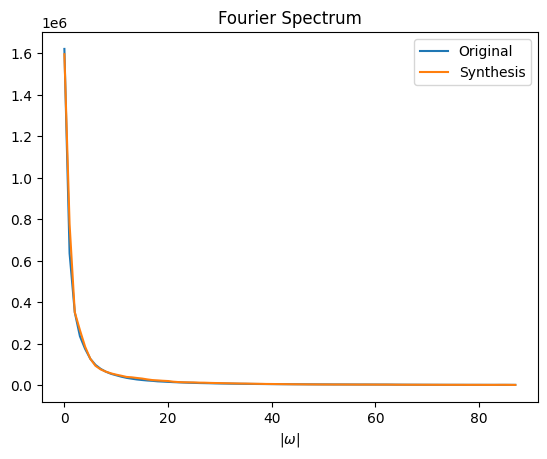

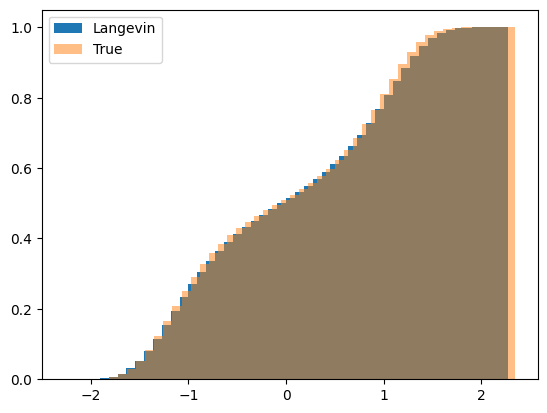

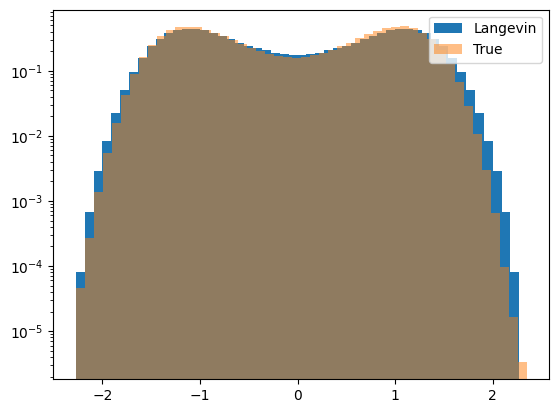

mean_true = tensor(-0.0261)
std_true = tensor(1.0003)
mean_langevin = tensor(-1.5460e-09)
std_langevin = tensor(1.0157)


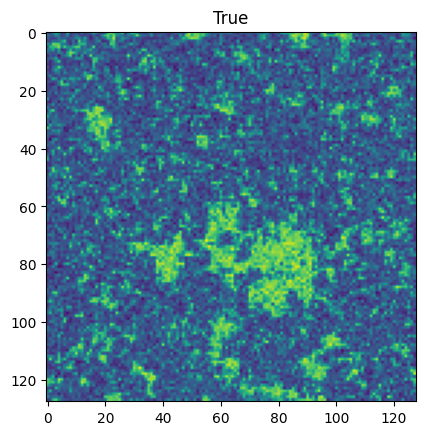

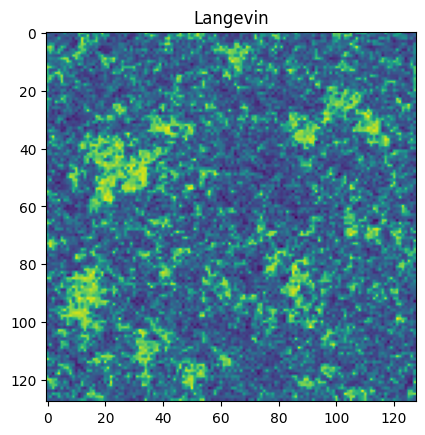

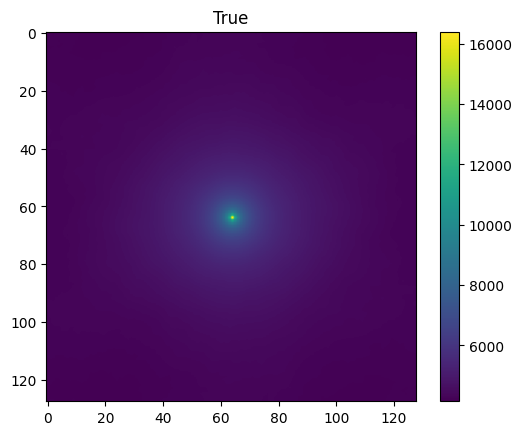

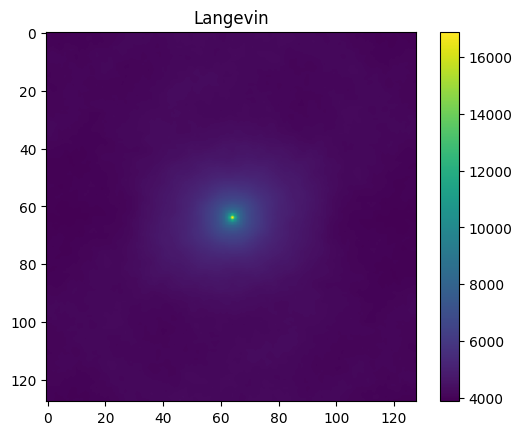

In [25]:
#Compare Synthesis and originals
Show_langevin(phi_s[::50],torch.cat([x_reco,-x_reco]),log=True)

Compare histograms of the $\bar x_{j+1}$ fields.

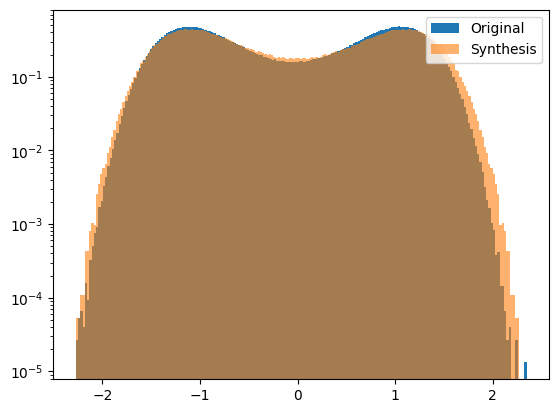

In [29]:
compare_hist(torch.cat([x_reco,-x_reco]),phi_s[::50])

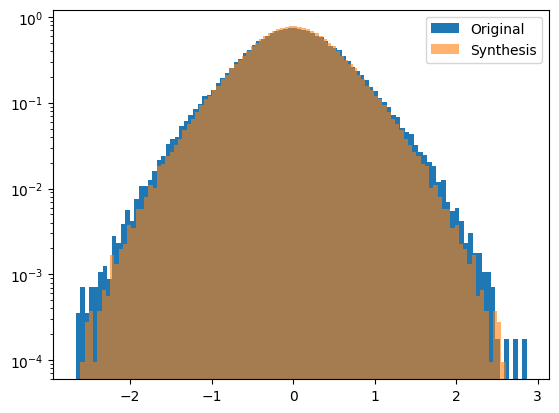

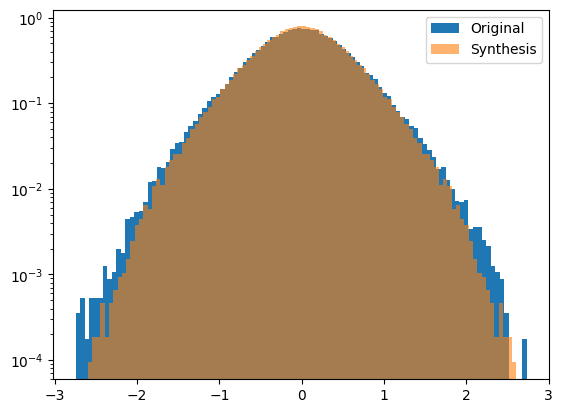

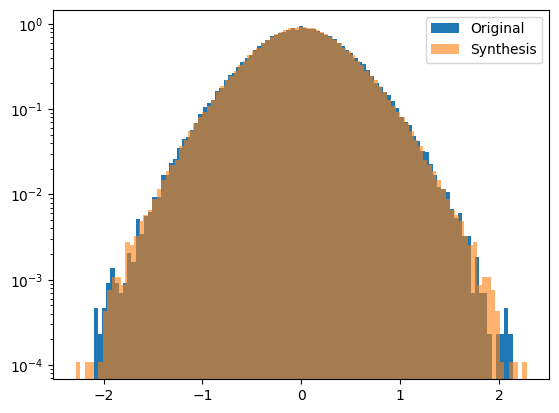

In [27]:
x_high_reco = ansatz.decompose(torch.cat([x_reco,-x_reco]).cuda())[1]
x_high = ansatz.decompose(phi_s)[1][:len(x_reco)]
compare_hist(x_high_reco[:,0],x_high[:,0],bins=100)
compare_hist(x_high_reco[:,1],x_high[:,1],bins=100)
compare_hist(x_high_reco[:,2],x_high[:,2],bins=100)

In [28]:
save(torch.cat([x_reco,-x_reco]),L,KEY,dir_synth)

# Analysing Synthesis

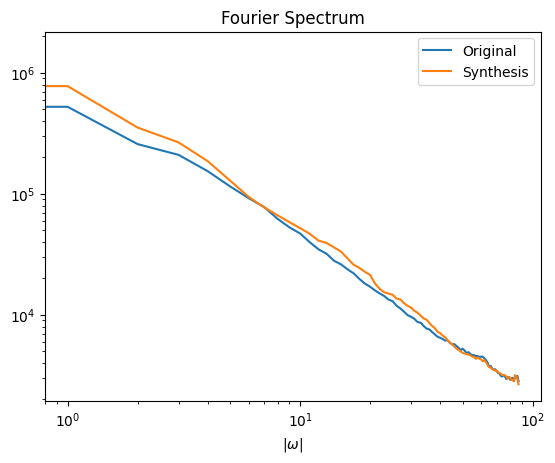

In [37]:
#Comparing spectrum of original and synthetised data
Compare_Spectrum(torch.cat([phi_s[::500],-phi_s[::500]]),torch.cat([x_reco,-x_reco]),log=True)

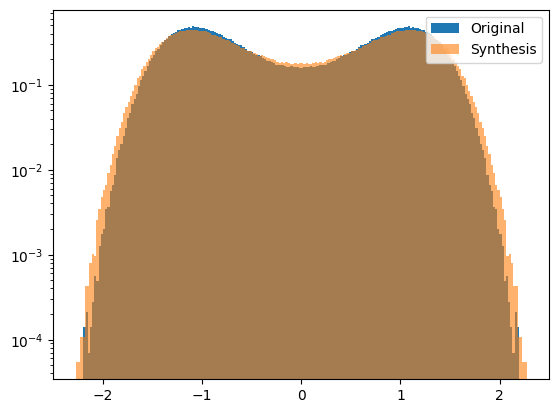

In [36]:
#Comparing histogram of original and synthetised data
compare_hist(torch.cat([x_reco,-x_reco]),torch.cat([phi_s[::500],-phi_s[::500]]))

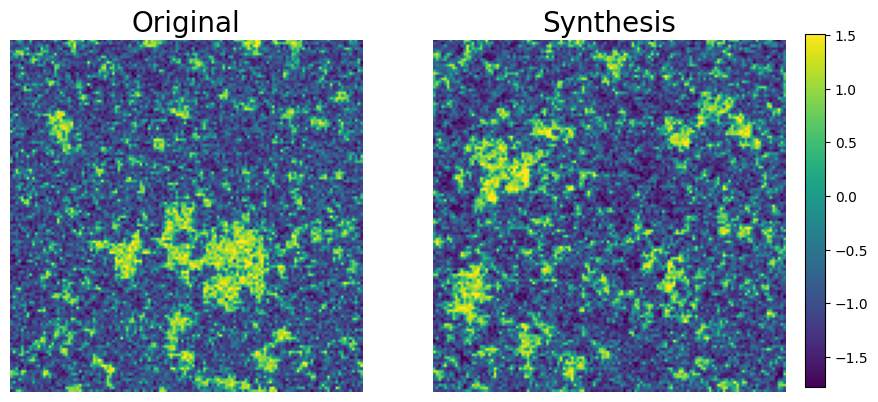

In [38]:
#Comparing samples of original and synthetised data
fig, (ax1,ax2) = plt.subplots(figsize=(10,7),nrows=1, ncols=2)
vmin = torch.quantile(phi_s[0], 0.005).cpu()
vmax = torch.quantile(phi_s[0], 0.995).cpu()


im = ax1.imshow(phi_s[0].cpu(),vmin=vmin,vmax=vmax) ; ax1.set_title('Original',fontsize=20)
ax1.axis('off')

ax2.imshow(x_reco[0].cpu(),vmin=vmin,vmax=vmax) ; ax2.set_title('Synthesis',fontsize=20)
ax2.axis('off')
cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.505])
fig.colorbar(im, cax=cbar_ax)


plt.show()

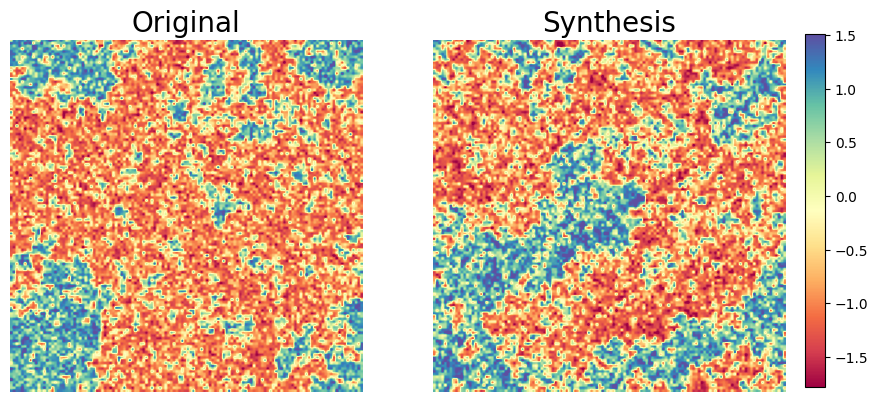

In [39]:
#Comparing samples of original and synthetised data
fig, (ax1,ax2) = plt.subplots(figsize=(10,7),nrows=1, ncols=2)
vmin = torch.quantile(phi_s[0], 0.005).cpu()
vmax = torch.quantile(phi_s[0], 0.995).cpu()


im = ax1.imshow(phi_s[1].cpu(),vmin=vmin,vmax=vmax,cmap='Spectral') ; ax1.set_title('Original',fontsize=20)
ax1.axis('off')

ax2.imshow(x_reco[3].cpu(),vmin=vmin,vmax=vmax,cmap='Spectral') ; ax2.set_title('Synthesis',fontsize=20)
ax2.axis('off')
cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.505])
fig.colorbar(im, cax=cbar_ax)


plt.show()

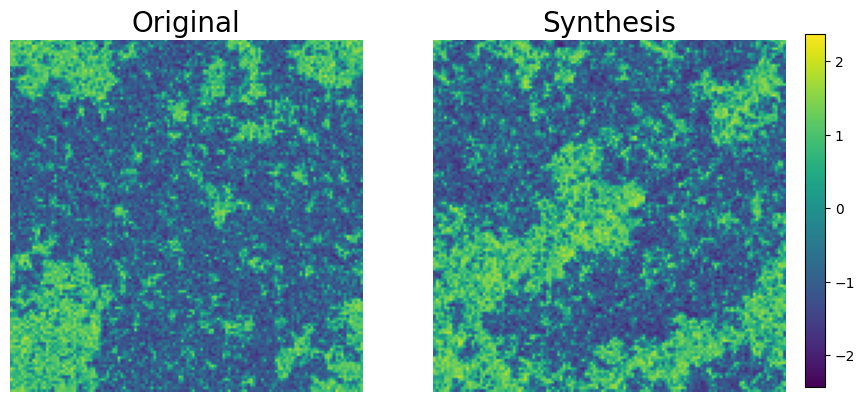

In [40]:
#Comparing samples of original and synthetised data
fig, (ax1,ax2) = plt.subplots(figsize=(10,7),nrows=1, ncols=2)
vmin = phi_s.min()
vmax = phi_s.max()


im = ax1.imshow(phi_s[1].cpu(),vmin=vmin,vmax=vmax) ; ax1.set_title('Original',fontsize=20)
ax1.axis('off')

ax2.imshow(x_reco[3].cpu(),vmin=vmin,vmax=vmax) ; ax2.set_title('Synthesis',fontsize=20)
ax2.axis('off')
cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.505])
fig.colorbar(im, cax=cbar_ax)


plt.show()